# Experimento de Rutherford

Una de las demostraciones más claras de los fallos del modelo de Thomson fue obtenida en el año 1911 por Ernest Rutherford. Donde se estudió la dispersion de partículas $\alpha$ por átomo.

En particular estudiamos las trayectorias de las particulas desviadas (partículas-$\alpha$) después de la colisión con un átomo de Au, que forma parte de una lámina muy delgada.

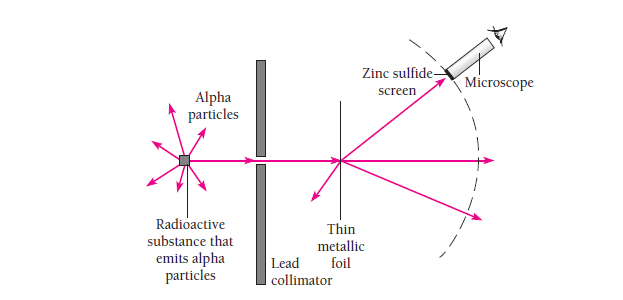

Definimos las librerías a utilizar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Definimos la función de fuerza

In [2]:
m=6.645e-27 #masa de la particula alfa 
k=8987551788
q=2*1.6e-19 #carga de la particula alfa
Q=79*q #nucleo del oro #79
p=k*Q*q/m

def aceleracion(x,y):
    r2=(x**2 +y**2) #magnitud de la distancia
    acel=p/r2   #aceleracion
    
    return acel

En este caso estamos estudiando el caso de una fuerza provocada por toda la carga concentrada en el núcleo en posición 0.

Posteriormente definimos los integradores

In [3]:
#Integrador en la coordenada X.
def xt_n(xn_1,yn_1,vn_1,dt):
    r=np.sqrt(xn_1**2 +yn_1**2)
    an_1=aceleracion(xn_1,yn_1)*(xn_1/r) #aceleracion de la particula en dirección x
    vn=vn_1 + an_1*dt #Calculamos la velocidad
    return xn_1 +vn*dt+0.5*an_1*dt**2,vn #integración para el paso siguiente

#Integrador en la coordenada Y.
def yt_n(xn_1,yn_1,vn_1,dt):
    r=np.sqrt(xn_1**2 +yn_1**2)
    an_2=aceleracion(xn_1,yn_1)*(yn_1/r) # aceleración en y
    vn=vn_1 + an_2*dt # Velocidad en y
    return yn_1 +vn*dt + 0.5*an_2*dt**2,vn #integración paso siguiente y_n

La condición inicial está dada por la energía cinética K y solo velocidad horizontal

In [4]:
#Condiciones iniciales

K=4.7*10**6*1.6*10**-19 # energía cinética inicial
vxi=np.sqrt(2*K/m) #velocidad inicial en x
vy0=0 #velocidad inicial en y
xi=-1000.0*10.0**-15 #valor de la posicion en x inicial 

#Para la posición inicial en y, el llamado paŕametro de impacto, lo variamos en un rango
#para explorar que pasa para diferentes valores

yns=np.linspace(-10**-13,10**-13,90) #es 10^-13

#Parámetros de integración
dt=10**-21#tiempo final deseado 

#Listas donde se almacenaran los datos.
xs=[]
ys=[]
thethas=[]

In [5]:
#generador de trayectorias 
for yn in yns:
    x=[] #vectores donde almacenamos los elementos por ciclo, una vez guardados aqui serán mandados a xs y de manera análoga a ys 
    y=[]
    xn=1.0*xi
    vx0=1.0*vxi
    vy0=0 #velocidad inicial en y
    
    for _ in range(90):
        xn,vx0=xt_n(xn,yn,vx0,dt)
        yn,vy0=yt_n(xn,yn,vy0,dt)
        x.append(xn) #Esta linea lo que hace es añadir elemento a elemento cada una de las pociciones xn a el vector x 
        y.append(yn) #Esto mismo pero para el vector yn 
        thethas.append(np.pi-np.arctan(y[-1]/x[-1])) #Calcula los angulos entre los elementos de los vectores x,y 
        xs.append(x) #mandamos todo a xs
        ys.append(y)#mandamos todo a ys
    

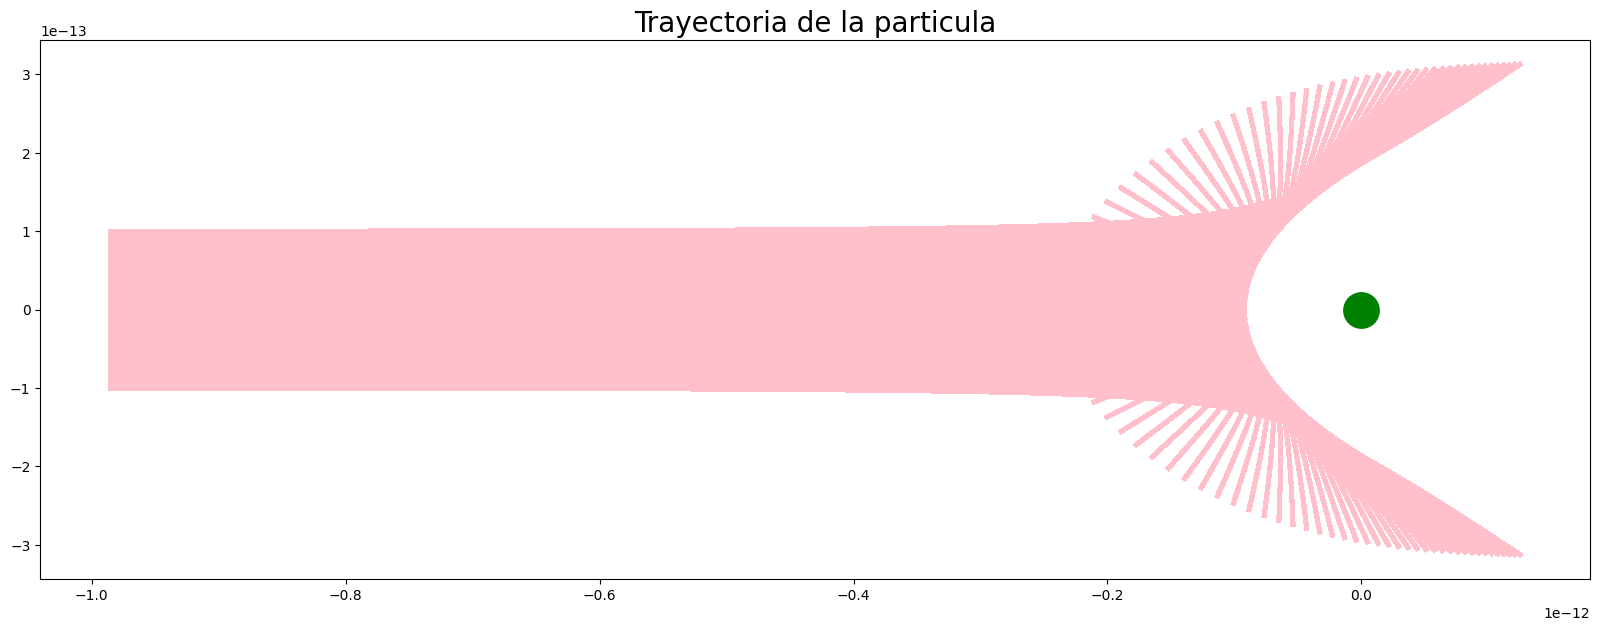

In [6]:
#Graficacion de las trayectorias
plt.figure(figsize=(20,7))
for x,y in zip(xs,ys): #aquí estamos graficando acada uno de los vectores obtenidos en xs y ys, obteniendo asi la proxima grafica
  plt.plot(x,y,lw=3,color="pink")
plt.title("Trayectoria de la particula",fontsize=20)
plt.scatter(0, 0, s=650, color="green") #simula ser el nucleo del atomo 
plt.show()

Se observa una clara desviacion de sus trayectorias para este caso donde la fuerza de interacción es con un núcleo y toda la carga concentrada en el centro.

#Actividad.

Realizar un programa similar al anterior en donde se simule el experimento de Rutherford; Pero ahora con el atomo de Thomson, donde consideraremos una interación con una esfera de carga de carga uniforme y radio de 1 Angstrom. 

Para esto esto resulta conveniente que tengamos una ecuación que defina la aceleración del sistema en términos de la nueva fuerza $F(x,t)$ en la cual consideremos la interacción que siente la particula alfa con una distribución de carga esferica (en la de Rutherford se condideró el nucleo atómico como una sola carga puntual).

Referencias: Quantum Physics Of Atoms, Molecules, Solids, Nuclei And Particles; Robert Eisberg and Robert Resnik, second edition,pag 87.

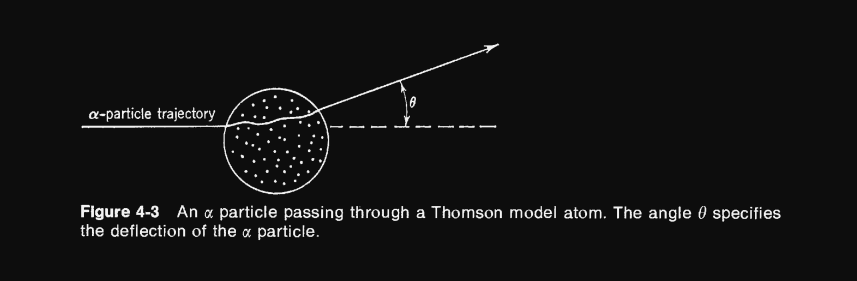

Definimos la funcion de fuerza usando ley de gauss para una esfera

In [7]:
R = 1e-10 #1 Angstrom = 1x10^-10 m 
Vol = (4/3)* np.pi * R**3
dens = Q / Vol
perm = 8.854187817e-12 #permitividad del vacio 

def acelera_cion(x, y):
    r = np.sqrt(x**2 + y**2) # magnitud de la distancia

    # checamos si está fuera o dentro de la esfera
    if r < R:
        acel = (q/m) * (dens/(3*perm)) * r   # aceleracion
    else:
        acel = p/(r**2)   # aceleracion

    return acel

En este caso estamos estudiando el caso de una fuerza provocada por una esfera de carga de carga uniforme y radio de 1 Angstrom.

Usamos los mismos <b>integradores</b> ya definidos

La condición inicial está dada por la energía cinética K y solo velocidad horizontal

In [8]:
#Condiciones iniciales

#RECICLAMOS LAS CONDICIONES INICIALES, SOLO CAMBIAMOS yns
yn_s=np.linspace(-1e-10,1e-10,10)  

#Listas donde se almacenaran los datos.
x_s=[]
y_s=[]
the_thas=[]

In [9]:
#generador de trayectorias 
for yn in yn_s:
    x=[] #vectores donde almacenamos los elementos por ciclo, una vez guardados aqui serán mandados a xs y de manera análoga a ys 
    y=[]
    xn=1.0*xi
    vx0=1.0*vxi
    vy0=0 #velocidad inicial en y
    
    for _ in range(90):
        xn,vx0=xt_n(xn,yn,vx0,dt)
        yn,vy0=yt_n(xn,yn,vy0,dt)
        x.append(xn) #Esta linea lo que hace es añadir elemento a elemento cada una de las pociciones xn a el vector x 
        y.append(yn) #Esto mismo pero para el vector yn 
        the_thas.append(np.pi-np.arctan(y[-1]/x[-1])) #Calcula los angulos entre los elementos de los vectores x,y 
        x_s.append(x) #mandamos todo a xs
        y_s.append(y)#mandamos todo a ys
    

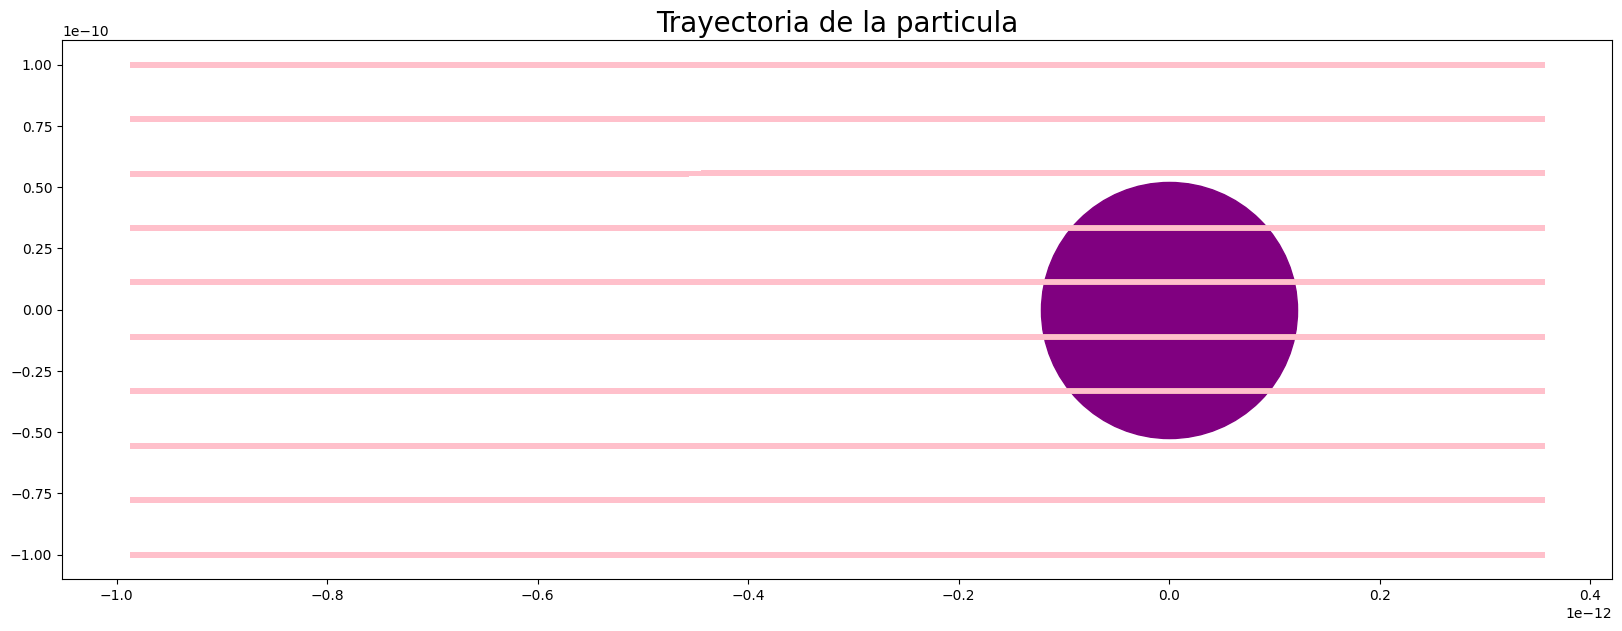

In [10]:
#Graficacion de las trayectorias
plt.figure(figsize=(20,7))
for x,y in zip(x_s,y_s): #aquí estamos graficando acada uno de los vectores obtenidos en xs y ys, obteniendo asi la proxima grafica
  plt.plot(x,y,lw=3,color="pink")
plt.title("Trayectoria de la particula",fontsize=20)
plt.scatter(0, 0, s=3.4e4, color="purple") #simula ser el nucleo del atomo 
plt.show()

es el resultado esperado, no se ejerce una fuerza suficiente para desviar la trayectoria